In [28]:
from experiments.civil_comments.bert.toxicity_subtypes.confidence_scores import severe_toxicity

# Data
subtypes = [
    "Severe Toxicity",
    "Obscene",
    "Threat",
    "Insult",
    "Identity Attack",
    "Sexual Explicit"
]
comment_counts = [8, 7648, 2793, 79887, 7633, 3119]
accuracies = [0.88, 0.70, 0.36, 0.69, 0.29, 0.49]


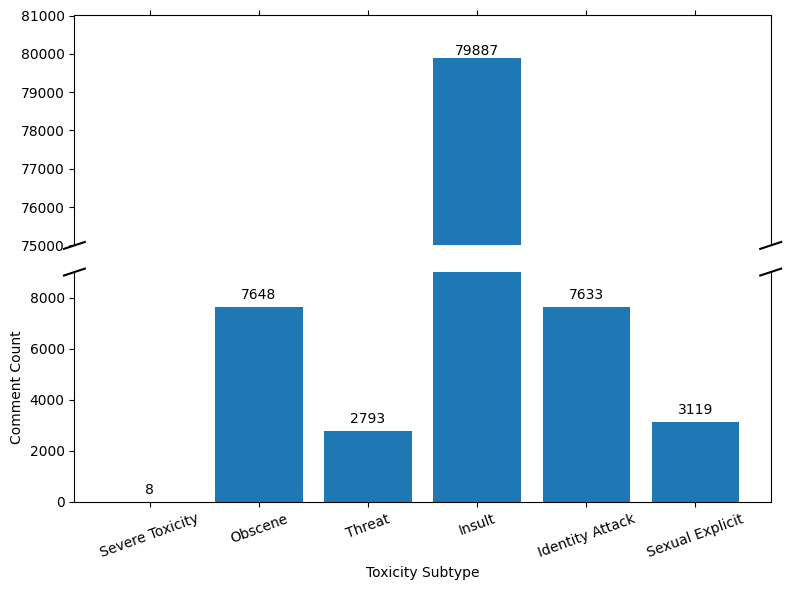

In [34]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (axes) stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# -------------------------------------------------------
# 1) Define the break points for the y-axes
#    - ax1 will show the high values (e.g., focusing on the large bar)
#    - ax2 will show the lower range.
# -------------------------------------------------------
ax1.set_ylim(75000, 81000)  # Upper plot zoom (adjust as needed)
ax2.set_ylim(0, 9000)       # Lower plot zoom (adjust as needed)

# -------------------------------------------------------
# 2) Plot the bars on both axes
# -------------------------------------------------------
bars_top = ax1.bar(subtypes, comment_counts)
bars_bottom = ax2.bar(subtypes, comment_counts)

# -------------------------------------------------------
# 3) Add labels on each bar
#    We check which axis should display the label based on the bar height.
# -------------------------------------------------------
# For the top axis (ax1), only label if the bar is near or in the upper range
for bar in bars_top:
    height = bar.get_height()
    if height > ax1.get_ylim()[0]:  # If it's in the range of ax1
        ax1.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f"{height}",
            ha='center',
            va='bottom',
            fontsize=10,
        )

# For the bottom axis (ax2), label if the bar is in the lower range
for bar in bars_bottom:
    height = bar.get_height()
    if height < ax2.get_ylim()[1]:  # If it's in the range of ax2
        ax2.text(
            bar.get_x() + bar.get_width()/2,
            height + 200,  # Slight offset above the bar
            f"{height}",
            ha='center',
            va='bottom',
            fontsize=10
        )

# -------------------------------------------------------
# 4) Hide the spines between ax1 and ax2, add 'break' marks
# -------------------------------------------------------
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # Don't show x labels on top subplot
ax2.xaxis.tick_bottom()

# Diagonal marks to indicate broken axis
d = 0.015  # Diagonal line size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

# -------------------------------------------------------
# 5) Labeling and final touches
# -------------------------------------------------------
ax2.set_ylabel("Comment Count")
ax2.set_xlabel("Toxicity Subtype")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


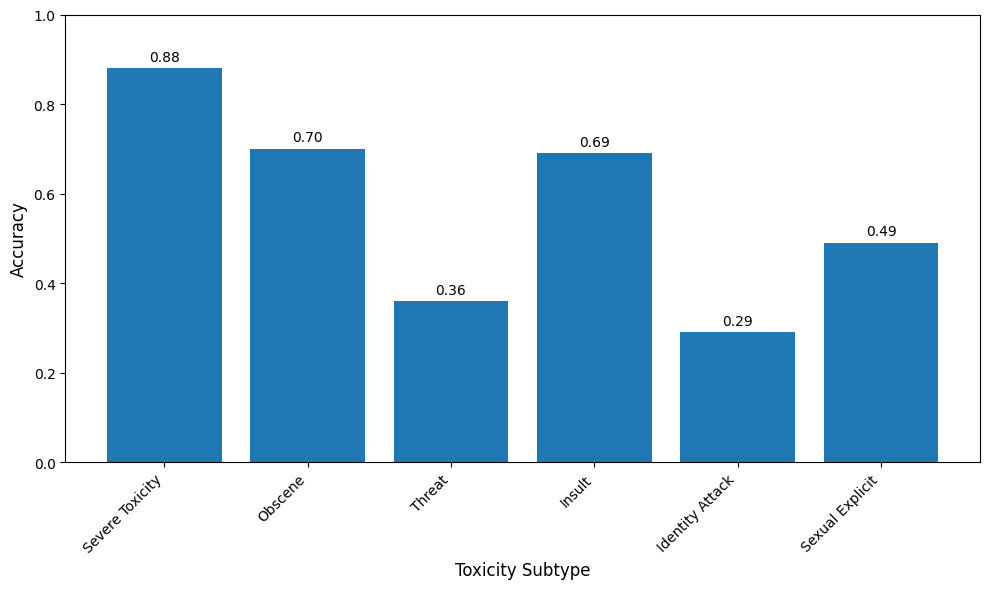

In [33]:
plt.figure(figsize=(10, 6))
bars = plt.bar(subtypes, accuracies)
for bar in bars:
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2
    y_position = height + 0.01
    plt.text(x_position, y_position, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Toxicity Subtype", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1)
plt.tight_layout()

plt.show()

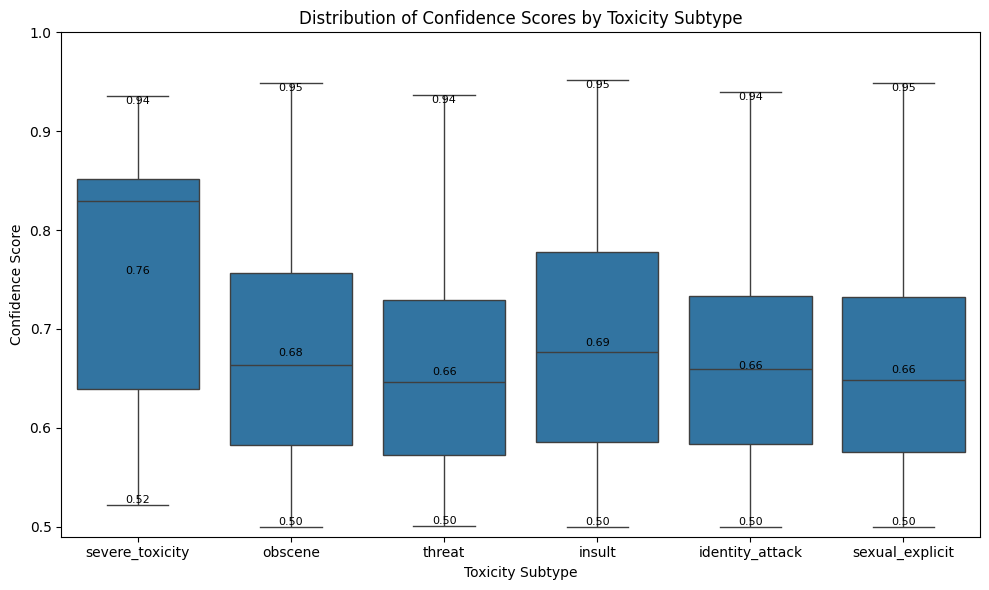

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from experiments.civil_comments.bert.toxicity_subtypes.confidence_scores import (
    severe_toxicity, obscene, threat, insult, identity_attack, sexual_explicit
)

# Subtypes and their corresponding scores
subtypes = ["severe_toxicity", "obscene", "threat", "insult", "identity_attack", "sexual_explicit"]
scores = [severe_toxicity, obscene, threat, insult, identity_attack, sexual_explicit]

# Create a long-form DataFrame
data = pd.DataFrame({
    "score": np.concatenate(scores),
    "subtype": np.concatenate([[subtype] * len(score) for subtype, score in zip(subtypes, scores)])
})

# Create the box plot Boxplot of Confidence Scores by Toxicity Subtype
plt.figure(figsize=(10, 6))
sns.boxplot(x="subtype", y="score", data=data)

# Calculate min, max, and avg for each subtype and annotate the plot
for i, (subtype, score_array) in enumerate(zip(subtypes, scores)):
    min_score = np.min(score_array)
    max_score = np.max(score_array)
    avg_score = np.mean(score_array)

    # Add annotations for min, max, and average
    plt.text(i, min_score, f"{min_score:.2f}", ha="center", va="bottom", fontsize=8)
    plt.text(i, max_score, f"{max_score:.2f}", ha="center", va="top", fontsize=8)
    plt.text(i, avg_score, f"{avg_score:.2f}", ha="center", va="center", fontsize=8)

# Add plot labels and title
plt.ylabel("Confidence Score")
plt.xlabel("Toxicity Subtype")
plt.ylim(0.49, 1)
plt.tight_layout()
plt.show()


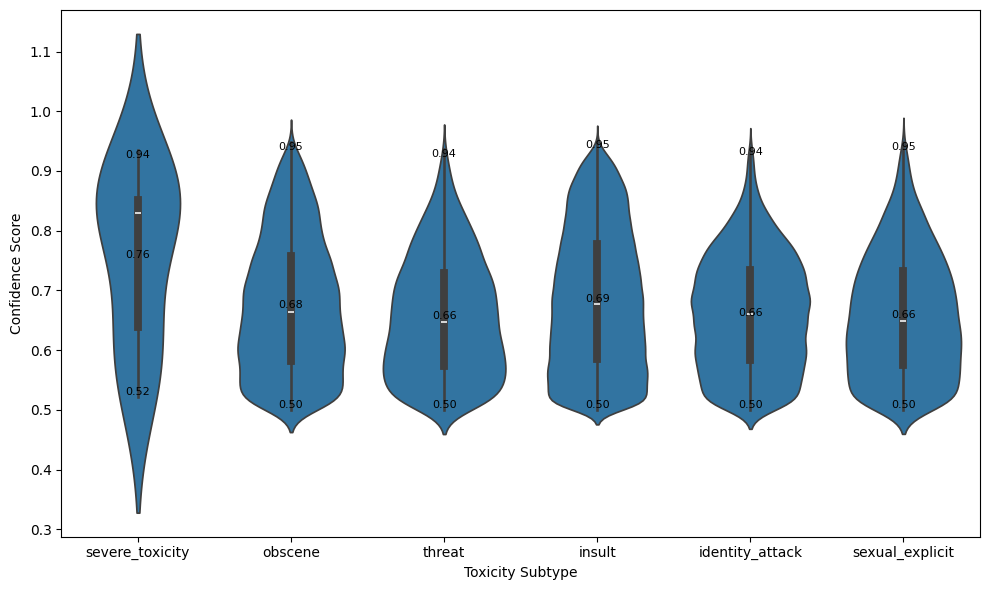

In [59]:
# Create the violin plot Violin Plot of Confidence Scores by Toxicity Subtype
plt.figure(figsize=(10, 6))
sns.violinplot(x="subtype", y="score", data=data, inner="box")

# Calculate min, max, and avg for each subtype and annotate the plot
for i, (subtype, score_array) in enumerate(zip(subtypes, scores)):
    min_score = np.min(score_array)
    max_score = np.max(score_array)
    avg_score = np.mean(score_array)

    # Add annotations for min, max, and average
    plt.text(i, min_score, f"{min_score:.2f}", ha="center", va="bottom", fontsize=8)
    plt.text(i, max_score, f"{max_score:.2f}", ha="center", va="top", fontsize=8)
    plt.text(i, avg_score, f"{avg_score:.2f}", ha="center", va="center", fontsize=8)

# Add plot labels and title
plt.ylabel("Confidence Score")
plt.xlabel("Toxicity Subtype")
plt.tight_layout()
plt.show()
